# Решающие деревья

Например, для принятия решения о страховании того или иного автовладельца дерево решений может выглядеть следующим образом:

<div style="text-align: center;">
    <img src="./../img/des_tree.svg" style="width: 500px;"/>
</div>

Схожим образом работает алгоритм машинного обучения Решающее Дерево (Decision Tree).

## ОПРЕДЕЛЕНИЕ

Формально дерево решений — это связный ациклический граф. В нём можно выделить три типа вершин:

- Корневая вершина (root node) — откуда всё начинается.
- Внутренние вершины (intermediate nodes).
- Листья (leafs) — самые глубокие вершины дерева, в которых содержится «ответ».

Во внутренней или корневой вершине признак проверяется на некий логический критерий, по результатам которого мы движемся всё глубже по дереву.

Определенный бонус решающего дерева в том, что его легко интерпретировать, а также легко визуализировать ход принятия решения. Однако есть и ряд недостатков. В целом достоинства и недостатки данного метода следующие:


## ДОСТОИНСТВА

- Деревья требуют небольших усилий при подготовке данных (не требуется специфической предобработки).
- Дерево решений не требует нормализации/масштабирования данных.
- Наличие пропусков не оказывает существенного влияния на построение дерева.
- Модель деревьев решений достаточно интуитивно понятна и легко объяснима даже людям, не разбирающимся в методе.

## НЕДОСТАТКИ

- Требует затрат больших вычислительных мощностей (по сравнению с другими алгоритмами).
- В силу дискретной структуры дерево не дифференцируется по параметрам — нельзя найти хотя бы локальный экстремум.
- Небольшое изменение в данных может заметно повлиять на структуру дерева.
- При работе с непрерывными числовыми признаками дерево делит их на категории, и теряет информацию.
- Алгоритм дает плохие результаты, если дерево используется для решения задачи классификации при несбалансированных классах.

In [1]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_squared_error

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

%matplotlib inline

RANDOM_SEED = 139

In [2]:
# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

<ipython-input-3-9010e64a5031>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')


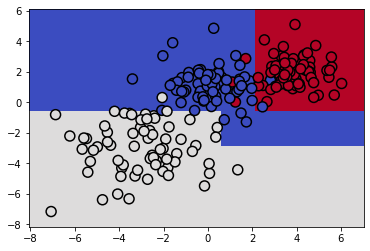

In [3]:
train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

> Плоскость делят 4 прямые, следовательно есть 4 разделения выборки надвое, для такого количества разделений дерево должно быть как минимум глубины 3

## Задача:

Вам предложен датасет с некоторыми характеристиками банкнот, по которым мы будем определять, является ли банкнота фальшивой или настоящей.

<div style="text-align: center;">
    <img src="./../img/payment-processed-2.png" style="width: 500px;"/>
</div>

> Более подробную информацию про датасет, а также сам датасет можно найти [здесь](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). Также можете его скачать напрямую по [этой ссылке](https://lms.skillfactory.ru/assets/courseware/v1/ad29ebf5005123a0f5f50399a7bb64fb/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/bill_authentication.csv).

Параметры решающего дерева, которые понадобятся для решения задачи:

- max_depth — максимальная глубина дерева.
- max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве. Это нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.
- min_samples_leaf — минимальное число объектов в листе. У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов.

### Подзадача 1:
Обучите на предложенных данных решающее дерево. Целевой переменной здесь является переменная Class. Размер тестовой выборки возьмите за 0.2, random_state = 17 для разбиения и дерева. Максимальную глубину дерева примите за , максимальное число признаков, по которым ищется лучшее разбиение в дереве — за . Какое значение f1-score вы получили? Округлите до трёх знаков после точки-разделителя.

In [4]:
bill_authentication_df = pd.read_csv('./data/bill_authentication.csv')

In [5]:
bill_authentication_df.sample(5)

,Variance,Skewness,Curtosis,Entropy,Class
891,-0.55008,2.86590,-1.64880,-2.43190,1
1058,-1.56210,-2.21210,4.25910,0.27972,1
1111,-6.36790,8.01020,0.42470,-3.22070,1
286,1.34190,-4.42210,8.09000,-1.73490,0
274,5.27560,0.13863,0.12138,1.14350,0


In [6]:
RANDOM_SEED = 17

X_train, X_test, y_train, y_test = train_test_split(
    bill_authentication_df.drop(columns=['Class'], axis=1), 
    bill_authentication_df['Class'], 
    test_size=0.2, 
    random_state=RANDOM_SEED)

clf_tree = DecisionTreeClassifier(
    max_depth=3,
    max_features=2,
    random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(X_train, y_train)

predicted = clf_tree.predict(X_test)

np.round(f1_score(y_test, predicted), 3)

0.866

### Подзадача 2:

Проклассифицируйте банкноту с вектором признаков 2.04378,-0.38422,1.437292,0.76421. К какому классу она относится?

In [7]:
clf_tree.predict(np.array([2.04378, -0.38422, 1.437292, 0.76421]).reshape(1, 4))[0]

0

# ЗАДАЧА О ПОТРЕБЛЕНИИ ТОПЛИВА

<div style="text-align: center;">
    <img src="./../img/eastwood-downloading.png" style="width: 500px;"/>
</div>
Потренируемся реализовывать задачу регрессии с помощью решающих деревьев на реальных данных. В данной задаче мы попробуем предсказать потребление топлива. Датасет лежит [здесь](./data/petrol_consumption.csv).

### Подзадача 1

Обучите решающее дерево для регрессии на предложенных данных, размер тестовой выборки возьмите за 0.3, random_state = 42 для разбиения и дерева. Вычислите RMSE, округлите до двух знаков после точки-разделителя.

In [8]:
petrol_consumption_df = pd.read_csv('./data/petrol_consumption.csv')

In [9]:
petrol_consumption_df.sample(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
11,7.5,5126,14186,0.525,471
36,5.0,4045,17782,0.566,640
10,8.0,4391,5939,0.530,580
32,8.0,3063,6524,0.578,577
25,9.0,3721,4746,0.544,566


In [10]:
RANDOM_SEED = 42

X_train, X_test, y_train, y_test = train_test_split(
    petrol_consumption_df.drop(columns=['Petrol_Consumption'], axis=1), 
    petrol_consumption_df['Petrol_Consumption'], 
    test_size=0.3, 
    random_state=RANDOM_SEED)

reg_tree = DecisionTreeRegressor(random_state=RANDOM_SEED)

# training the tree
reg_tree.fit(X_train, y_train)

predicted = reg_tree.predict(X_test)

np.round(mean_squared_error(y_test, predicted, squared=False), 2)

87.97

### Подзадача 2

Какова глубина дерева?

In [11]:
reg_tree.get_depth()

11